In [75]:
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas.datasets import get_path
import folium
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [76]:
#Cleaning the data
df=pd.read_excel("fatal-police-shootings-data_original.xls")
print(df.head(5))
list1 = df.columns
#print(list1)
#df_1 = df.dropna()
#print(df_1.to_string()) 
#To remove the rows which are empty 
df.dropna(inplace=True)
#To fix the wrong format in the date
df['date'] = pd.to_datetime(df['date'])
#print(df.to_string())
#print(df.isnull().sum())
len(df)

   id                name       date   manner_of_death       armed   age  \
0   3          Tim Elliot 2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke 2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero 2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman 2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez 2015-01-04              shot    nail gun  39.0   

  gender race           city state  signs_of_mental_illness threat_level  \
0      M    A        Shelton    WA                     True       attack   
1      M    W          Aloha    OR                    False       attack   
2      M    H        Wichita    KS                    False        other   
3      M    W  San Francisco    CA                     True       attack   
4      M    H          Evans    CO                    False       attack   

          flee  body_camera  longitude  latitude  is_geocoding_exact  
0  Not fleeing 

5175

In [77]:
male =[]
female =[]
gender = df['gender'].to_list()
for i in gender:
    if i == 'M':
        male.append(i)
    else:
        female.append(i) 

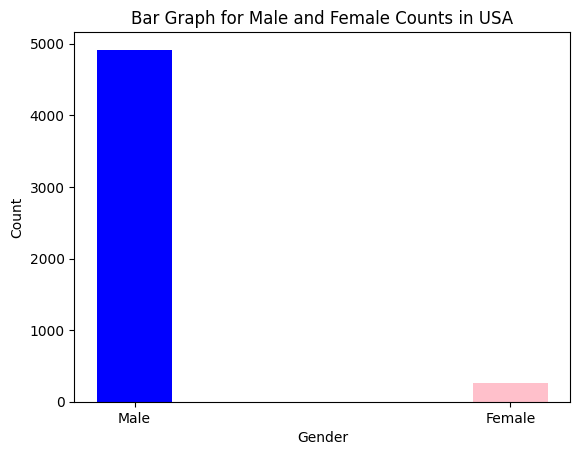

In [118]:
categories = ['Male', 'Female']
counts = [len(male), len(female)]
plt.bar(categories, counts, color=['blue', 'pink'], width = 0.2)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Graph for Male and Female Counts in USA')
plt.show()

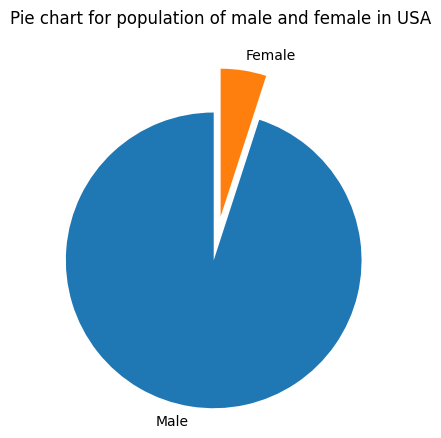

In [117]:
plt.pie(counts,labels = ['Male','Female'], explode = [0.3,0],startangle = 90)
plt.title("Pie chart for population of male and female in USA")
plt.show()

In [80]:
male_percentage = (len(male) / (len(male)+len(female))) * 100
male_percentage


95.01449275362319

In [81]:
female_percentage = (len(female) / (len(male)+len(female)) ) * 100
female_percentage

4.9855072463768115

In [82]:
df_2 = pd.DataFrame(columns=df.columns)
df_2 = df.copy()
df_2.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [83]:
BadColumns=['id', 'name', 'date', 'is_geocoding_exact','city','armed','body_camera']
# Drop bad columns from the data
df_2.drop(BadColumns,axis=1)

,manner_of_death,age,gender,race,state,signs_of_mental_illness,threat_level,flee,longitude,latitude
0,shot,53.0,M,A,WA,True,attack,Not fleeing,-123.122,47.247
1,shot,47.0,M,W,OR,False,attack,Not fleeing,-122.892,45.487
2,shot and Tasered,23.0,M,H,KS,False,other,Not fleeing,-97.281,37.695
3,shot,32.0,M,W,CA,True,attack,Not fleeing,-122.422,37.763
4,shot,39.0,M,H,CO,False,attack,Not fleeing,-104.692,40.384
...,...,...,...,...,...,...,...,...,...,...
7972,shot,39.0,M,W,VA,False,attack,Foot,-81.920,36.715
7973,shot,30.0,M,W,AZ,False,other,Foot,-111.791,33.299
7977,shot,28.0,M,W,CA,False,attack,Foot,-116.419,34.959
7980,shot,58.0,F,W,TX,False,other,Car,-97.699,30.535


In [84]:
df_Tx=df[df['state']=='TX']

   Latitude  Longitude
0    28.955    -95.369
1    31.858   -106.439
2    28.912    -98.542
3    29.031    -95.428
4    32.407    -96.069
   Latitude  Longitude  PredictedClusterID
0    28.955    -95.369                   3
1    31.858   -106.439                   0
2    28.912    -98.542                   1
3    29.031    -95.428                   3
4    32.407    -96.069                   2


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


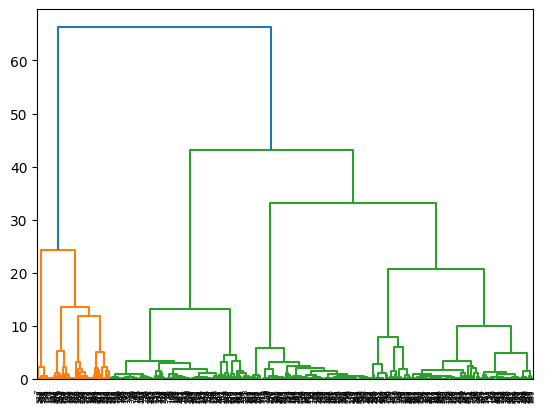

In [116]:
np.random.seed(42)
latitude = df_Tx['latitude'].values
longitude = df_Tx['longitude'].values
X = np.column_stack((latitude, longitude))

ClusterData = pd.DataFrame(X, columns=['Latitude', 'Longitude'])
print(ClusterData.head())

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

ClusterData['PredictedClusterID'] = hc.fit_predict(X)
print(ClusterData.head())

map_center = [np.mean(latitude), np.mean(longitude)]
mymap = folium.Map(location=map_center, zoom_start=5)

colors = ['red', 'blue','green','purple']

for lat, lon, cluster in zip(latitude, longitude, ClusterData['PredictedClusterID']):
    color = colors[cluster]
    folium.CircleMarker(location=[lat, lon], radius=5, color=color, fill=True, fill_color=color).add_to(mymap)


mymap

In [86]:
df_Tx['race'].value_counts()

race
W    198
H    147
B    107
A      4
O      2
Name: count, dtype: int64

In [87]:
male_tx = []
female_tx = []
gender_tx = df_Tx['gender'].to_list()
for i in gender_tx:
    if i == 'M':
        male_tx.append(i)
    else:
        female_tx.append(i) 


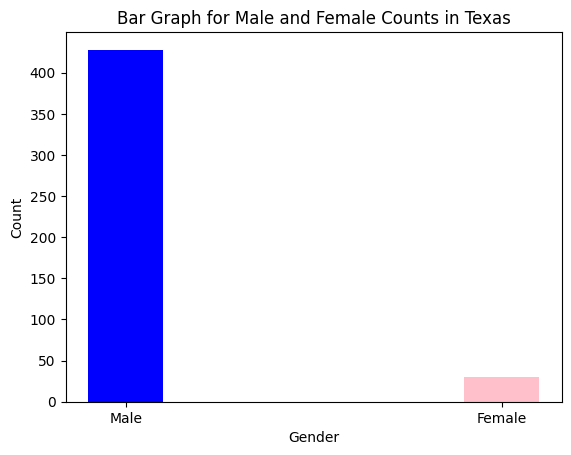

In [115]:
categories = ['Male', 'Female']
counts_tx = [len(male_tx), len(female_tx)]
plt.bar(categories, counts_tx, color=['blue', 'pink'], width = 0.2)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Graph for Male and Female Counts in Texas')
plt.show()

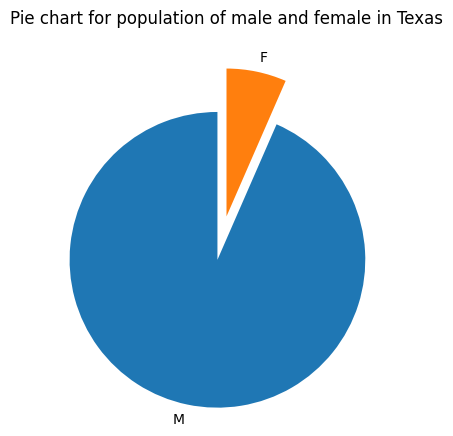

In [114]:
plt.pie(counts_tx,labels = ['M','F'], explode = [0.3,0],startangle = 90)
plt.title("Pie chart for population of male and female in Texas")
plt.show()

In [90]:
male_percentage_tx = (len(male_tx) / (len(male_tx)+len(female_tx))) * 100
male_percentage_tx

93.44978165938865

In [91]:
female_percentage_tx = (len(female_tx) / (len(male_tx)+len(female_tx))) * 100
female_percentage_tx

6.550218340611353

In [107]:
#shot and tasered black female shot and tasered

prob_shot = df_Tx[df_Tx['manner_of_death'] == 'shot and Tasered'].shape[0] / df_Tx.shape[0]

prob_male = df_Tx[df_Tx['gender'] == 'F'].shape[0] / df_Tx.shape[0]

prob_black = df_Tx[df_Tx['race'] == 'B'].shape[0] / df_Tx.shape[0]
female_and_black = df_Tx[(df_Tx['gender'] == 'F') & (df_Tx['race'] == 'B') & (df_Tx['manner_of_death'] == 'shot and Tasered')].shape[0] / df_Tx[(df_Tx['gender'] == 'F') & (df_Tx['race'] == 'B')].shape[0]

# Apply Bayes' theorem
prob_female_shot_given_black = (female_and_black * prob_shot) / prob_black

print(f"The probability of a Female being shot and Tasered when the person is from the Black race is approximately: {posterior_prob_male_shot_given_black:.4f}")

The probability of a Female being shot and Tasered when the person is from the Black race is approximately: 0.0872


In [93]:
df.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [94]:
df_3 = df.drop(['id','name','date','city','is_geocoding_exact','body_camera','flee','armed'], axis=1)

In [95]:
df_3.head(5)

,manner_of_death,age,gender,race,state,signs_of_mental_illness,threat_level,longitude,latitude
0,shot,53.0,M,A,WA,True,attack,-123.122,47.247
1,shot,47.0,M,W,OR,False,attack,-122.892,45.487
2,shot and Tasered,23.0,M,H,KS,False,other,-97.281,37.695
3,shot,32.0,M,W,CA,True,attack,-122.422,37.763
4,shot,39.0,M,H,CO,False,attack,-104.692,40.384


In [96]:

dummy_df = pd.get_dummies(df_3['manner_of_death'], prefix='manner_of_death')
df_3 = pd.concat([df_3, dummy_df], axis=1)
df_3 = df_3.drop('manner_of_death', axis=1)


dummy_df = pd.get_dummies(df_3['race'], prefix='race')
df_3 = pd.concat([df_3, dummy_df], axis=1)
df_3 = df_3.drop('race', axis=1)


dummy_df = pd.get_dummies(df_3['state'], prefix='state')
df_3 = pd.concat([df_3, dummy_df], axis=1)
df_3 = df_3.drop('state', axis=1)

dummy_df = pd.get_dummies(df_3['signs_of_mental_illness'], prefix='signs_of_mental_illness')
df_3 = pd.concat([df_3, dummy_df], axis=1)
df_3 = df_3.drop('signs_of_mental_illness', axis=1)


dummy_df = pd.get_dummies(df_3['threat_level'], prefix='threat_level')
df_3 = pd.concat([df_3, dummy_df], axis=1)
df_3 = df_3.drop('threat_level', axis=1)


In [97]:
df_3.head(5)

,age,gender,longitude,latitude,manner_of_death_shot,manner_of_death_shot and Tasered,race_A,race_B,race_H,race_N,...,state_VT,state_WA,state_WI,state_WV,state_WY,signs_of_mental_illness_False,signs_of_mental_illness_True,threat_level_attack,threat_level_other,threat_level_undetermined
0,53.0,M,-123.122,47.247,True,False,True,False,False,False,...,False,True,False,False,False,False,True,True,False,False
1,47.0,M,-122.892,45.487,True,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2,23.0,M,-97.281,37.695,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
3,32.0,M,-122.422,37.763,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
4,39.0,M,-104.692,40.384,True,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False


In [98]:

label_encoder = LabelEncoder()
df_3['encoded_gender'] = label_encoder.fit_transform(df_3['gender'])
df_3 = df_3.drop('gender', axis=1)

In [99]:
df_3.head(5)

,age,longitude,latitude,manner_of_death_shot,manner_of_death_shot and Tasered,race_A,race_B,race_H,race_N,race_O,...,state_WA,state_WI,state_WV,state_WY,signs_of_mental_illness_False,signs_of_mental_illness_True,threat_level_attack,threat_level_other,threat_level_undetermined,encoded_gender
0,53.0,-123.122,47.247,True,False,True,False,False,False,False,...,True,False,False,False,False,True,True,False,False,1
1,47.0,-122.892,45.487,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,1
2,23.0,-97.281,37.695,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,1
3,32.0,-122.422,37.763,True,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,1
4,39.0,-104.692,40.384,True,False,False,False,True,False,False,...,False,False,False,False,True,False,True,False,False,1


In [113]:
l=['age',
 'longitude',
 'latitude',
 'manner_of_death_shot',
 'manner_of_death_shot and Tasered',
 'race_A',
 'race_B',
 'race_H',
 'race_N',
 'race_O',
 'race_W',
 'state_AK',
 'state_AL',
 'state_AR',
 'state_AZ',
 'state_CA',
 'state_CO',
 'state_CT',
 'state_DC',
 'state_DE',
 'state_FL',
 'state_GA',
 'state_HI',
 'state_IA',
 'state_ID',
 'state_IL',
 'state_IN',
 'state_KS',
 'state_KY',
 'state_LA',
 'state_MA',
 'state_MD',
 'state_ME',
 'state_MI',
 'state_MN',
 'state_MO',
 'state_MS',
 'state_MT',
 'state_NC',
 'state_ND',
 'state_NE',
 'state_NH',
 'state_NJ',
 'state_NM',
 'state_NV',
 'state_NY',
 'state_OH',
 'state_OK',
 'state_OR',
 'state_PA',
 'state_RI',
 'state_SC',
 'state_SD',
 'state_TN',
 'state_TX',
 'state_UT',
 'state_VA',
 'state_VT',
 'state_WA',
 'state_WI',
 'state_WV',
 'state_WY',
 'signs_of_mental_illness_False',
 'signs_of_mental_illness_True',
 'threat_level_attack',
 'threat_level_other',
 'threat_level_undetermined']
 

len(l)

67

In [101]:

TargetVariable='encoded_gender'
Predictors=l
X=df_3[Predictors].values
y=df_3[TargetVariable].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred,zero_division = 1)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.9487922705314009
Confusion Matrix:
[[  0  53]
 [  0 982]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        53
           1       0.95      1.00      0.97       982

    accuracy                           0.95      1035
   macro avg       0.97      0.50      0.49      1035
weighted avg       0.95      0.95      0.92      1035



In [102]:


# Separate Target Variable and Predictor Variables
TargetVariable = 'encoded_gender'

X = df_3[l].values
y = df_3[TargetVariable].values

model = LogisticRegression(max_iter=1000)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
cv_accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

print("Cross-Validation Accuracy:", cv_accuracy)
print("Mean Accuracy:", cv_accuracy.mean())


Cross-Validation Accuracy: [0.95072464 0.95072464 0.94975845 0.94975845 0.94975845]
Mean Accuracy: 0.9501449275362319


   Latitude  Longitude
0    28.955    -95.369
1    31.858   -106.439
2    28.912    -98.542
3    29.031    -95.428
4    32.407    -96.069
   Latitude  Longitude  PredictedClusterID
0    28.955    -95.369                   3
1    31.858   -106.439                   0
2    28.912    -98.542                   1
3    29.031    -95.428                   3
4    32.407    -96.069                   2
Cluster Statistics:
   PredictedClusterID  MeanLatitude  MeanLongitude  MedianLatitude  \
0                   0     32.862328    -102.575299          32.009   
1                   1     29.254154     -98.154953          29.510   
2                   2     32.751054     -96.616124          32.769   
3                   3     29.784717     -95.272770          29.760   

   MedianLongitude  Count  
0         -102.233     67  
1          -98.196    149  
2          -96.880    129  
3          -95.363    113  


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


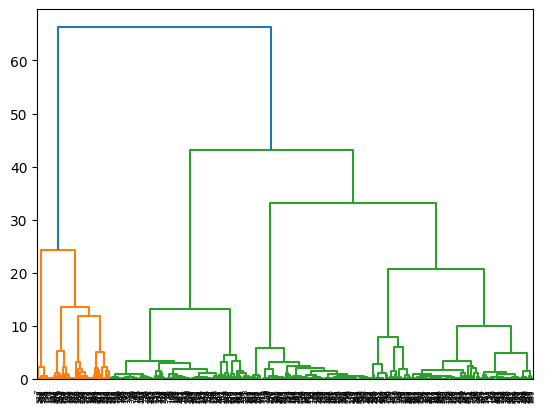

In [103]:


np.random.seed(42)
latitude = df_Tx['latitude'].values
longitude = df_Tx['longitude'].values
X = np.column_stack((latitude, longitude))

ClusterData = pd.DataFrame(X, columns=['Latitude', 'Longitude'])
print(ClusterData.head())

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')

ClusterData['PredictedClusterID'] = hc.fit_predict(X)
print(ClusterData.head())

# Add statistics for each cluster
cluster_stats = ClusterData.groupby('PredictedClusterID').agg(
    MeanLatitude=('Latitude', 'mean'),
    MeanLongitude=('Longitude', 'mean'),
    MedianLatitude=('Latitude', 'median'),
    MedianLongitude=('Longitude', 'median'),
    Count=('Latitude', 'count')
).reset_index()

# Print or display the cluster statistics
print("Cluster Statistics:")
print(cluster_stats)

# Create a map centered on the average coordinates
map_center = [np.mean(latitude), np.mean(longitude)]
mymap = folium.Map(location=map_center, zoom_start=5)

colors = ['red', 'blue', 'green', 'purple']

for lat, lon, cluster in zip(latitude, longitude, ClusterData['PredictedClusterID']):
    color = colors[cluster]
    folium.CircleMarker(location=[lat, lon], radius=5, color=color, fill=True, fill_color=color).add_to(mymap)

for index, row in cluster_stats.iterrows():
    cluster_center = [row['MeanLatitude'], row['MeanLongitude']]
    folium.Marker(location=cluster_center, icon=folium.Icon(color='black'), 
                  popup=f"Cluster {int(row['PredictedClusterID']) + 1}\nCount: {int(row['Count'])}\nMean: {row['MeanLatitude']:.4f}, {row['MeanLongitude']:.4f}\nMedian: {row['MedianLatitude']:.4f}, {row['MedianLongitude']:.4f}"
                 ).add_to(mymap)


mymap
